In [6]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


LongLatt = r'(\d+\.\d*\,\s\-\d+\.\d*)'
Property_Original=pd.read_csv("1/Property_Sales.csv")
Location_P = Property_Original["Location 1"].copy()
Property= pd.DataFrame(Property_Original,columns =["Total Value","Location 1"])

Location=Location_P.str.extract(LongLatt, expand=False).str.rsplit(",",expand=True)
Lattitude_P=pd.DataFrame(Location[0])
Longitude_P=pd.DataFrame(Location[1])
Property=pd.merge(Property,Lattitude_P,how='left',left_index=True,right_index=True)
Property=pd.merge(Property,Longitude_P,how='left',left_index=True,right_index=True)
Property.rename(columns={0:'Lattitude', 1:'Longitude'}, inplace=True)
Property.drop(Property[Property['Total Value'].isin([0])].index,inplace=True)
Property.dropna(axis=0, how='any',inplace=True)

D:\anocanda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
import numpy as np
import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


def grid_in_shape (x,y,zippped_shape):
    # Build a point to represent the grid
    grid_label = 1
    point = Point(x,y)
    # Check where the point is located
    for subshape in zipped_shape:
        # Return true if the point is in the ploygon
        if subshape[0].contains(point):
            # Collect the result
            grid_label = subshape[1]
    return grid_label

def make_plon(shape):
    sub_plon = []
    for item in shape:
        # Using the points information to draw the ploygon
        polygon = Polygon(item.points)
        sub_plon.append(polygon)
    return sub_plon

def read_shape(shapename):
    sf = shapefile.Reader(shapename)
    shapes = sf.shapes()
    recs = sf.records()
    return shapes,recs

def makegrid (xmin,xmax,ymin,ymax,n):
##n for number of grid each row
    x = np.linspace(xmin,xmax,n)
    y = np.linspace(ymin,ymax,n)
    xv, yv = np.meshgrid(x, y)
    return xv,yv

def zip_shape (shapes,recs):
    zipped_shape = zip (shapes,recs)
    return list(zipped_shape)

def build_matrix(some_matrix, zipped_shape,n,x,y):
    for i in range(n):
        for j in range(n):
            some_matrix[i][j] = grid_in_shape(x[i,j],y[i,j],zipped_shape)
   


In [15]:
sf = shapefile.Reader("1/Police_Precincts")
shapes_police = sf.shapes()
xmax = []
xmin = []
ymax = []
ymin = []
for i in shapes_police:
    a = list(zip(*i.points))
    xmax.append(max(list(a[0])))
    xmin.append(min(list(a[0])))
    
    ymax.append(max(list(a[1])))
    ymin.append(min(list(a[1])))

    
xv,yv = makegrid (min(xmin),max(xmax),max(ymax),min(ymin),300)

price_record = np.zeros((300,300))
number_record = np.zeros((300,300))


for i in Property.index:
    idx = (np.abs(xv[0]-float(Property["Longitude"][i]))).argmin()
    idy = (np.abs(yv[:,0]-float(Property["Lattitude"][i]))).argmin()
    price_record[idx,idy] = price_record[idx,idy]+ Property["Total Value"][i]
    number_record[idx,idy] = number_record[idx,idy]+1        

    

In [16]:
min(xmin),max(xmax),max(ymax),min(ymin)

(-76.22805592650755, -75.92011236464145, 36.93208469500689, 36.55041250005247)

<Figure size 720x720 with 0 Axes>

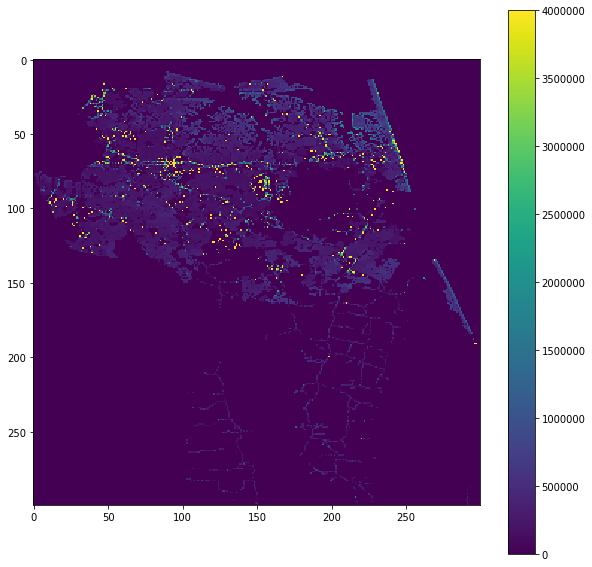

In [17]:
import copy
avg_record = np.zeros((300,300))

avg_record = price_record/(number_record+1)

itemindex = np.where(avg_record>=4000000)
avg_record1 = copy.deepcopy(avg_record)
for i in list(zip(*itemindex)):
    avg_record1[i[0],i[1]] = 4000000
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.figure(figsize=(10,10))
plt.imshow(avg_record1.T)
plt.colorbar()
plt.show()

In [14]:
for i in Police.index:
    idx = (np.abs(xv[0]-float(Police["Longitude"][i]))).argmin()
    idy = (np.abs(yv[:,0]-float(Police["Lattitude"][i]))).argmin()
    #price_record[idy][idx] = price_record[idy][idx]+ Property["Total Value"][i]

NameError: name 'Police' is not defined

<Figure size 720x720 with 0 Axes>

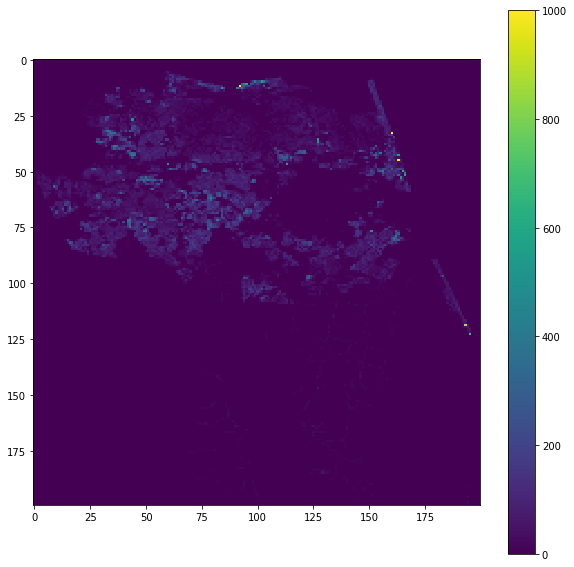

In [7]:
itemindex = np.where(number_record>=1000)
number_record1 = copy.deepcopy(number_record)
for i in list(zip(*itemindex)):
    number_record1[i[0],i[1]] = 1000
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.figure(figsize=(10,10))
plt.imshow(number_record1.T)
plt.colorbar()

In [8]:
shapes,recs = read_shape("1/Census_Tract_2010")
for i in range(len(recs)):
    if recs[i][5] == "9901":
        del recs[i]
        del shapes[i]
        break
plon = make_plon(shapes)
recs_tract_no = np.array(recs)[:,5]
zipped_shape = zip_shape(plon,recs_tract_no)
census_record = np.zeros((300,300))
#build_matrix(census_record, zipped_shape,300,xv,yv)

In [19]:
recs_area = np.array(recs)[:,9]

In [23]:
pd.DataFrame(np.vstack((recs_tract_no,recs_area)).T).to_csv('area.csv')

In [12]:
pd.DataFrame(recs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,51,810,046224,51810046224,462.24,Census Tract 462.24,G5020,S,1344292,0,+36.7793349,-076.1523907,2.099497e+06,6525.291276
1,2,51,810,045603,51810045603,456.03,Census Tract 456.03,G5020,S,831455,0,+36.8415871,-076.1246708,1.300658e+06,6870.326064
2,3,51,810,045425,51810045425,454.25,Census Tract 454.25,G5020,S,1402668,0,+36.7682068,-076.0065152,2.190044e+06,5985.070685
3,4,51,810,041400,51810041400,414,Census Tract 414,G5020,S,5946583,1439740,+36.8897478,-076.1214601,1.156952e+07,16614.067639
4,5,51,810,041600,51810041600,416,Census Tract 416,G5020,S,3216948,1241608,+36.8694585,-076.1208858,6.979557e+06,12065.569318
5,6,51,810,042201,51810042201,422.01,Census Tract 422.01,G5020,S,2839800,511138,+36.8620354,-076.0998748,5.244787e+06,9791.817464
6,7,51,810,042000,51810042000,420,Census Tract 420,G5020,S,5756120,3546756,+36.8801463,-076.0881546,1.456704e+07,15762.913218
7,8,51,810,042202,51810042202,422.02,Census Tract 422.02,G5020,S,3922671,785763,+36.8539214,-076.0792990,7.367794e+06,11504.282086
8,9,51,810,042400,51810042400,424,Census Tract 424,G5020,S,2488722,161496,+36.8471356,-076.1003869,4.146414e+06,8771.797488
9,10,51,810,042600,51810042600,426,Census Tract 426,G5020,S,2665543,301939,+36.8428045,-076.0727465,4.642228e+06,12419.341756


<Figure size 720x720 with 0 Axes>

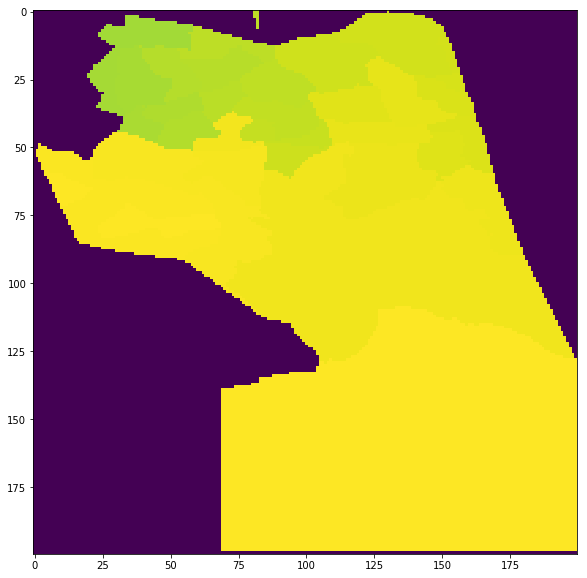

In [13]:

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.figure(figsize=(10,10))
census_record = census_record *1000
plt.imshow(census_record)

In [30]:
len(recs_tract_no)

99

In [15]:
area = np.array(recs)[:,-2]

In [106]:
Property["Longitude"][5]

'1'

In [16]:
c = [recs_tract_no,area]

In [19]:
a = pd.DataFrame(c).T

In [21]:
a.to_csv('area.csv')

In [187]:
PoliceIncident.reindex(PoliceIncident['Longitude'].abs().sort_values(ascending=False).index)
# Lattitude=pd.DataFrame(Location[0]).astype(float) 
# Lattitude.dtypes 
# PoliceCall.info()

,Date Occured,Offense Description,Zone ID,Case Status,Location,Lattitude,Longitude
23839,08/22/2017 08:40:00 AM,DRUG/ EQUIPMENT VIOLATIONS,NaN,EXCEPTIONALLY CLEARED,"500 SOUTH ST\nPORTSMOUTH, VA 23704\n(36.832239...",36.832239,-76.302231
26143,04/17/2017 08:00:00 AM,"FRAUD, CREDIT CARD",NaN,INACTIVE - PENDING,"1000 MARINER ST\nNORFOLK, VA 23504\n(36.847703...",36.847703,-76.280919
39922,01/02/2017 12:23:00 PM,WEAPON LAW VIOLATIONS,NaN,CLEARED BY ARREST,"1100 HOLT ST\nNORFOLK, VA 23504\n(36.846512, -...",36.846512,-76.280417
82728,01/01/2012 12:00:00 AM,"FAMILY OFFENSE, NONVIOLENT, CHILD ABUSE",NaN,OTHER,"500 LIBERTY ST\nCHESAPEAKE, VA\n(36.822415, -7...",36.822415,-76.274517
79301,06/22/2018 02:49:00 PM,DRUG/ NARCOTIC VIOLATIONS,NaN,CLEARED BY ARREST,"1800 HANCOCK AV\nNORFOLK, VA 23509\n(36.871146...",36.871146,-76.267390
79299,06/22/2018 02:49:00 PM,WEAPON LAW VIOLATIONS,NaN,CLEARED BY ARREST,"1800 HANCOCK AV\nNORFOLK, VA 23509\n(36.871146...",36.871146,-76.267390
45504,05/10/2015 08:00:00 AM,"FRAUD, IDENTITY THEFT",420.0,"UNFOUNDED, NO FURTHER ACTION NEEDED","3500 BOW ST\nVIRGINIA BEACH, VA 23464\n(36.831...",36.831162,-76.227609
69555,02/06/2018 10:30:00 AM,"ASSAULT, SIMPLE, DOMESTIC",420.0,CLEARED BY ARREST,"3500 BOW ST\nVIRGINIA BEACH, VA 23464\n(36.831...",36.831162,-76.227609
80237,07/11/2018 03:10:00 AM,"LARCENY, FROM MOTOR VEHICLE",420.0,INACTIVE - PENDING,"3500 BOW ST\nVIRGINIA BEACH, VA 23464\n(36.831...",36.831162,-76.227609
18414,01/13/2016 08:00:00 AM,"FRAUD, IDENTITY THEFT",420.0,INACTIVE - PENDING,"3500 BOW ST\nVIRGINIA BEACH, VA 23464\n(36.831...",36.831162,-76.227609
